<a href="https://colab.research.google.com/github/zulfiqaralimir/Yield-Curve-and-ETF-Analysis/blob/master/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 1: Define the Top 30 XLF Holdings**
Based on XLF holdings as of July 2025 (top 30 holdings)

[Link Stock Analysis](https://stockanalysis.com/etf/xlf/holdings/?utm_source=chatgpt.com)

[Yahoo Finance](https://finance.yahoo.com/quote/XLF/holdings/?utm_source=chatgpt.com)

In [ ]:
holdings = [
    "BRK-B","JPM","V","MA","BAC","WFC","GS","AXP","MS","SPGI",
    "C","SCHW","BLK","PGR","COF","BX","MMC","CB","ICE","CME",
    "FISV","KKR","AJG","PNC","MCO","AON","COIN","PYPL","USB","BK"
]

###**Step 2: Download Prices and Compute Returns & Covariance**

In [ ]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yfin
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# 1. Download price data
# Your list of top 30 XLF tickers
holdings = [
    "BRK-B","JPM","V","MA","BAC","WFC","GS","AXP","MS","SPGI",
    "C","SCHW","BLK","PGR","COF","BX","MMC","CB","ICE","CME",
    "FISV","KKR","AJG","PNC","MCO","AON","COIN","PYPL","USB","BK"
]
# Define 6-month time period
start = datetime.date(2024, 1, 1)
end = datetime.date(2024, 7, 1)

# Download adjusted close prices
prices = yfin.download(holdings, start=start, end=end, auto_adjust=False, progress=False)

# Select the 'Adj Close' column from the multi-level columns
prices = prices['Adj Close']

# Display the first few rows
prices.head()

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FISV']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,AJG,AON,AXP,BAC,BK,BLK,BRK-B,BX,C,CB,...,MMC,MS,PGR,PNC,PYPL,SCHW,SPGI,USB,V,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,222.151123,285.621185,184.565155,32.658970,50.309341,773.296021,362.459991,123.142075,50.381668,223.651642,...,186.109558,89.284668,157.455460,147.862411,61.459999,67.648895,431.435944,41.019020,256.049530,47.562691
2024-01-03,222.170883,288.467346,182.614761,32.302517,49.752266,757.691040,366.750000,117.458733,50.951595,222.726929,...,187.235001,87.392487,158.955643,143.289536,58.630001,65.641960,424.980042,39.935390,255.169174,46.935970
2024-01-04,223.039719,288.318542,184.010986,32.562634,49.953968,759.430298,363.679993,117.986755,51.075085,223.602448,...,187.401398,87.620697,158.790054,144.111511,58.450001,65.485313,424.792236,40.365105,256.781433,47.514473
2024-01-05,222.427597,287.178162,185.898895,33.169563,50.318939,756.415466,365.589996,117.324333,51.607018,223.995956,...,186.765244,88.657112,158.507568,147.607300,60.119999,65.818169,423.071930,40.925602,256.860596,48.131542
2024-01-08,225.942505,293.078613,186.046371,32.909451,50.616688,770.291016,368.179993,117.449135,51.303051,222.520370,...,187.509033,88.913841,161.098831,148.826111,61.740002,66.376205,427.263855,41.065723,259.679504,48.131542


##**✅ Step 2: Compute Daily Returns**

In [ ]:
# Remove tickers (columns) with all NaNs
prices_cleaned = prices.dropna(axis=1, how='all')

# Then drop rows where all prices are missing
prices_cleaned = prices_cleaned.dropna(how='all')


In [ ]:
returns = prices_cleaned.pct_change().dropna()
returns.head()

Ticker,AJG,AON,AXP,BAC,BK,BLK,BRK-B,BX,C,CB,...,MMC,MS,PGR,PNC,PYPL,SCHW,SPGI,USB,V,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,0.000089,0.009965,-0.010568,-0.010914,-0.011073,-0.020180,0.011836,-0.046153,0.011312,-0.004135,...,0.006047,-0.021193,0.009528,-0.030927,-0.046046,-0.029667,-0.014964,-0.026418,-0.003438,-0.013177
2024-01-04,0.003911,-0.000516,0.007646,0.008053,0.004054,0.002295,-0.008371,0.004495,0.002424,0.003931,...,0.000889,0.002611,-0.001042,0.005736,-0.003070,-0.002386,-0.000442,0.010760,0.006318,0.012325
2024-01-05,-0.002744,-0.003955,0.010260,0.018639,0.007306,-0.003970,0.005252,-0.005614,0.010415,0.001760,...,-0.003395,0.011828,-0.001779,0.024258,0.028571,0.005083,-0.004050,0.013886,0.000308,0.012987
2024-01-08,0.015802,0.020546,0.000793,-0.007842,0.005917,0.018344,0.007084,0.001064,-0.005890,-0.006588,...,0.003982,0.002896,0.016348,0.008257,0.026946,0.008478,0.009908,0.003424,0.010974,0.000000
2024-01-09,-0.011799,-0.005279,-0.012896,-0.015515,0.004744,-0.003349,-0.003477,-0.010953,-0.009813,-0.003935,...,-0.002662,-0.015506,0.007861,-0.019109,-0.011176,-0.015487,-0.004628,-0.011374,0.003009,-0.012620


FISV was dropped due to data issues

##**🔢 Step 3: Compute the Covariance Matrix**
The covariance matrix helps us understand how returns of different stocks move together.

In [ ]:
# Compute covariance matrix of daily returns
stock_returns_covariance_matrix = returns.cov()

# Preview the matrix
stock_returns_covariance_matrix.head()

Ticker,AJG,AON,AXP,BAC,BK,BLK,BRK-B,BX,C,CB,...,MMC,MS,PGR,PNC,PYPL,SCHW,SPGI,USB,V,WFC
Ticker,,,,,,,,,,,,,,,,,,,,,
AJG,0.000103,0.000073,0.000020,0.000039,0.000030,0.000041,0.000034,0.000032,0.000028,0.000052,...,0.000058,0.000017,0.000036,0.000023,0.000014,0.000021,0.000034,0.000036,0.000022,0.000035
AON,0.000073,0.000152,0.000027,0.000030,0.000014,0.000038,0.000028,0.000025,0.000005,0.000027,...,0.000062,0.000013,0.000032,0.000015,0.000008,0.000021,0.000016,0.000023,0.000018,0.000023
AXP,0.000020,0.000027,0.000181,0.000085,0.000051,0.000059,0.000046,0.000083,0.000077,0.000034,...,0.000024,0.000060,0.000046,0.000078,0.000062,0.000068,0.000015,0.000086,0.000018,0.000084
BAC,0.000039,0.000030,0.000085,0.000167,0.000086,0.000080,0.000048,0.000114,0.000130,0.000037,...,0.000030,0.000103,0.000016,0.000140,0.000064,0.000084,0.000040,0.000141,0.000021,0.000123
BK,0.000030,0.000014,0.000051,0.000086,0.000107,0.000064,0.000036,0.000082,0.000078,0.000033,...,0.000023,0.000054,0.000015,0.000088,0.000069,0.000065,0.000036,0.000091,0.000023,0.000059


In [ ]:
# Use np.allclose to verify if the matrix is a symmetric matrix
print("\nIs the covariance matrix symmetric?",
      np.allclose(stock_returns_covariance_matrix, stock_returns_covariance_matrix.T))


Is the covariance matrix symmetric? True


In [ ]:
# Compute Correlation Matrix
correlation_matrix = returns.corr()

# Display top rows
correlation_matrix.head()

Ticker,AJG,AON,AXP,BAC,BK,BLK,BRK-B,BX,C,CB,...,MMC,MS,PGR,PNC,PYPL,SCHW,SPGI,USB,V,WFC
Ticker,,,,,,,,,,,,,,,,,,,,,
AJG,1.000000,0.583035,0.147244,0.296422,0.289740,0.360668,0.451945,0.177712,0.201944,0.468779,...,0.658648,0.119854,0.306908,0.154391,0.062582,0.158846,0.332982,0.239731,0.250079,0.253969
AON,0.583035,1.000000,0.161102,0.186531,0.109213,0.275219,0.305696,0.112057,0.027364,0.198232,...,0.578375,0.079169,0.225419,0.080860,0.029591,0.131532,0.129412,0.127073,0.168218,0.136025
AXP,0.147244,0.161102,1.000000,0.488779,0.370244,0.391015,0.453462,0.347760,0.419935,0.227077,...,0.206721,0.327368,0.293099,0.395833,0.207744,0.384917,0.113694,0.428107,0.153636,0.463340
BAC,0.296422,0.186531,0.488779,1.000000,0.646994,0.555572,0.500869,0.493564,0.736273,0.261865,...,0.269118,0.583731,0.103631,0.736828,0.223269,0.493611,0.311808,0.733252,0.184192,0.705055
BK,0.289740,0.109213,0.370244,0.646994,1.000000,0.557010,0.465147,0.444617,0.555709,0.291553,...,0.258356,0.387311,0.120978,0.583768,0.299626,0.478409,0.346028,0.589741,0.256445,0.426438


In [ ]:
print("\nIs the correlation matrix symmetric?",
      np.allclose(correlation_matrix, correlation_matrix.T))


Is the correlation matrix symmetric? True


##**Run PCA**

In [ ]:
# 1. Initialize PCA
pca = PCA()

# 2. Fit PCA to the returns data
pca.fit(returns)

# 3. Explained variance ratio
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Print explained variance ratio
print("Explained Variance Ratio (first 10 components):")
print(explained_variance[:10])

Explained Variance Ratio (first 10 components):
[0.40780624 0.19477112 0.06319253 0.05369445 0.04484421 0.03043447
 0.02370662 0.01964991 0.01827548 0.01676436]


This tells you how much of the data’s variation each principal component explains. You’ll often see that the first few components explain most of the variance.

Plot Variance Explained

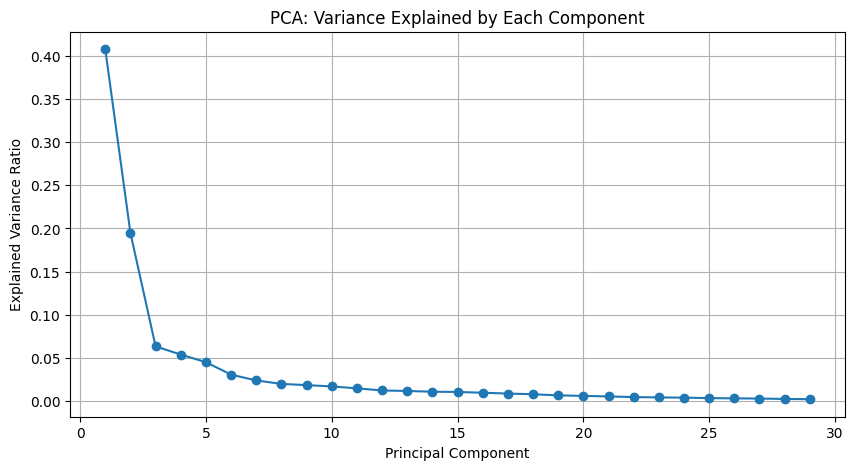

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('PCA: Variance Explained by Each Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

The first principal component explains over 40% of the total variance.

The first few components (maybe 5–6) explain the majority of the information in your data.

##**Singular Value Decomposition (SVD)**
SVD is a mathematical technique closely related to PCA. While PCA focuses on variance, SVD decomposes your data into matrices that can reveal structure and rank.

In [ ]:
from numpy.linalg import svd

# Standardize the returns (optional but good practice)
returns_centered = returns - returns.mean()

# Apply SVD
U, S, VT = svd(returns_centered, full_matrices=False)

# Print singular values
print("Singular Values:", S)


Singular Values: [0.60362717 0.41716141 0.23761547 0.21903149 0.20016818 0.16490154
 0.1455381  0.13250191 0.12778395 0.122387   0.11390134 0.10386492
 0.10116691 0.09755001 0.09601941 0.09165305 0.08711353 0.08271381
 0.07547451 0.07174633 0.06779769 0.06270092 0.05986009 0.05767782
 0.05335419 0.05084449 0.04886925 0.04451151 0.04124854]


**Plot Singular Values**

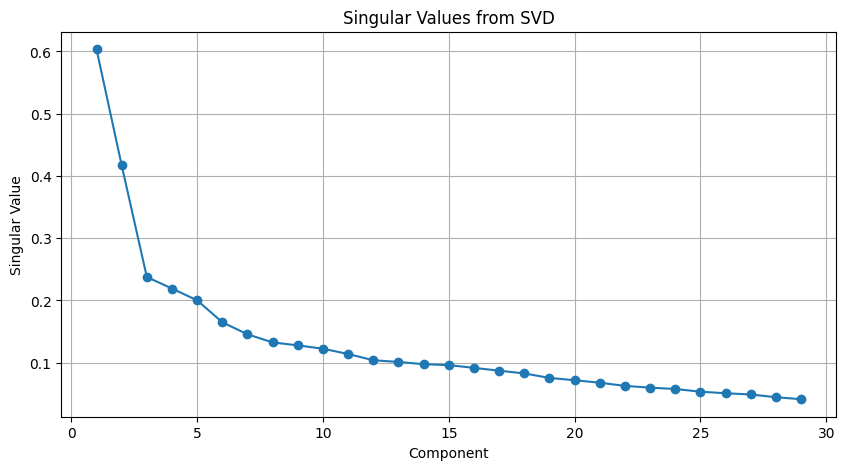

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(S) + 1), S, marker='o')
plt.title('Singular Values from SVD')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

This plot visualizes the singular values obtained from applying Singular Value Decomposition (SVD) on centered stock return data.

The first singular value is significantly larger than the others, indicating that the first component captures the most important structure in the data.

The second component still holds useful information but much less than the first.

From around the 6th or 7th component onward, the singular values drop steadily and flatten out, implying those components contribute less to the overall variation.

Just like with PCA, this confirms that a few dominant components capture most of the important information in the dataset. The remaining components may reflect noise or smaller, less impactful structures.

##**500+ Words Explaination**

In financial analysis, returns play a central role in understanding asset behavior over time. While prices tell us how much an asset is worth at a given point, returns quantify how much it changes, giving insight into growth, volatility, and risk. Returns allow us to compare assets on equal footing regardless of their price levels. For example, a $2 increase on a $20 stock is a 10% return, but the same $2 on a $200 stock is only 1%. This comparability makes returns essential for evaluating performance, computing risk metrics like volatility and Sharpe ratios, and performing statistical analyses like covariance, correlation, and Principal Component Analysis (PCA).

PCA and Singular Value Decomposition (SVD) are two powerful dimensionality reduction techniques used to extract structure from high-dimensional data like asset returns. Both methods help identify underlying patterns and reduce noise by summarizing the data with fewer components, but they differ in approach and interpretation. PCA is based on eigenvalue decomposition of the covariance (or correlation) matrix of the data. It finds orthogonal directions (called principal components) that maximize the variance captured in the data. In contrast, SVD operates directly on the original data matrix (not the covariance matrix) and decomposes it into three matrices: U, S, and Vᵀ. Here, S contains the singular values, which are closely related to the square roots of the eigenvalues from PCA. In fact, PCA can be implemented via SVD under the hood. The key distinction is that PCA emphasizes variance interpretation through covariance, while SVD gives a broader structural decomposition that also works well for data that is not centered or square.

To understand the mechanics of both PCA and SVD, it's essential to grasp the meaning of eigenvalues, eigenvectors, and singular values. In PCA, eigenvectors represent the directions (or axes) in which the data varies the most. These are the principal components, and each is orthogonal to the others, meaning they capture independent patterns. Eigenvalues, on the other hand, tell us how much variance is captured by each eigenvector. A large eigenvalue means the corresponding component explains a significant portion of the variation in the dataset. In practice, we often rank components by their eigenvalues and choose only the top few that collectively explain most of the variance, reducing dimensionality without losing too much information.

In SVD, the concept is similar but expressed through singular values. These values in matrix S quantify the strength or importance of each component derived from the data. The square of each singular value divided by the sum of all squared singular values gives the proportion of total variance explained—just like eigenvalues in PCA. Moreover, the columns of matrices U and V in SVD are analogous to eigenvectors, with U corresponding to the "left singular vectors" (patterns across rows, like stocks) and Vᵀ to the "right singular vectors" (patterns across columns, like time points).

In summary, returns are the foundation for financial analysis because they allow consistent, comparable evaluation of asset movements. PCA and SVD are two closely related tools that help simplify and interpret complex return data by identifying dominant patterns. While PCA is more common in finance due to its focus on variance via covariance matrices, SVD offers a more general approach that can be especially useful in computational applications. Understanding eigenvectors, eigenvalues, and singular values is key to interpreting these techniques, as they reveal the directions and magnitude of structure hidden within high-dimensional financial datasets.
